# Notebook that explore the LMC orbital histories

In [1]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D

font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


## To-Do:

1. Check which ones are the good simulations.
2. Organize those simulations on el gato. (jngaravitoc/MWLMC_sims/)
3. Check 100M sims disk COM.
4. Table with the summaries of the simulations.


|`Simulation`| `ICs` | Time (Gyrs) | Coordinates (kpc $\&$ km/s)|
|--------|---------|---------|--------|
| MWLMC3_40M_11_b0 | r=(24.33628 277.752518 58.543234), v=(4.336299 -58.767378 -77.49269) | 1.88  | r=(-0.21$\hat{x}$, -41.45$\hat{y}$, -28.11$\hat{z}$), v=(-72.23, -263.41, 218.57) |
| MWLMC4_40M_b0_ic10 | r=(25, 308, 88.6), v=(6, -37, -68.6) | 1.42 | r = (-1.23$\hat{x}$, -43.04$\hat{y}$, -26.82$\hat{z}$), v=(-58$\hat{x}$, -225.28$\hat{y}$, 226.16)$\hat{z}$ | 
| MWLMC5_40M_new_b0_10_ |  r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 2.32 | r = (-0.79$\hat{x}$, -43.96$\hat{y}$, -28.28$\hat{z}$), v=(-62.34$\hat{x}$, -239.11$\hat{y}$, 225.07)$\hat{z}$  | 
| MW_11LMC6_40M_b0 | r=(11.584929 247.791118 129.901859),v=(11.910111 11.210542 -77.135969) | 2.38 | r = (-1.18$\hat{x}$, -44.96$\hat{y}$, -27.3$\hat{z}$), v=(-66.8$\hat{x}$, -245.39$\hat{y}$, 229.84)$\hat{z}$ | 
| MWLMC3_40M_new_b1 | 
|  | 
| MWLMC5_40M_new_b1|
MWLMC6_40M_new_b1

|`Simulation`| Status| Inside 2 $\sigma$? |
|--------|----------|
| LMC3_40Mb1_ic20_new_orbit.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit1.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit2.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit3.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit4.txt | Done | No |
| LMC3_40Mb1_ic20_new_orbit5.txt |Done | No |
| LMC3_40Mb0_ic11_orbit.txt |  Done | yes |
| LMC4_40Mb1_ic20_orbit.txt| Done | No |
| LMC4_40Mb1_ic20_orbit_2.txt | Done | No |
| LMC4_40Mb1_ic20_orbit_3.txt | Done | No |
| LMC4_40Mb1_ic20_orbit_4.txt | Done | No |
| LMC4_40Mb0.txt|  Done  | check |
| LMC5_40Mb0_ic11_orbit.txt | Done! | Yes |
| LMC5_40Mb0_ic11_orbit2.txt |  Done | No |
| LMC5_40Mb0_ic11_orbit3.txt | Don't exist 40M simulations, this one was overwritten|
| LMC5_40Mb0_ic11_orbit4.txt | Don't exist 40M simulations, this one was overwritten|
| LMC5_40Mb0_ic11_orbit5.txt |  Done | No |
| LMC5_40Mb0_ic11_orbit6.txt |  Done | No |
| LMC6_40Mb0_ic11_orbit.txt | Done | (Almost) |
| LMC6_40Mb1_orbit_11.txt | running |


In [2]:
# Functions to reads the data from the Analytic integration
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]
    
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#Function that reads the N-body simulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    #time = data[:,0]
    #Rgal = data[:,1]
    x_sat= data[:,6]
    y_sat = data[:,7]
    z_sat = data[:,8]
    x_gal = data[:,0]
    y_gal = data[:,1]
    z_gal = data[:,2]
    #Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,3]
    vy_gal = data[:,4]
    vz_gal = data[:,5]
    Rgal= np.sqrt((x_sat-x_gal)**2 + (y_sat-y_gal)**2 + (z_sat-z_gal)**2)
    Vgal= np.sqrt((vx_sat-vx_gal)**2 + (vy_sat-vy_gal)**2 + (vz_sat-vz_gal)**2)

    return Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal

    
def best_values(x, y, z, vx, vy, vz):
    """
    Computes the closes value of the N-body orbit to the observed present day LMC positions
    and velocities.
    
    """
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    
    sigma_vx = 13
    sigma_vy = 15
    sigma_vz = 19
    
    dx = x_obs - x[index]
    dy = y_obs - y[index]
    dz = z_obs - z[index]
    
    dvx = vx_obs - vx[index]
    dvy = vy_obs - vy[index]
    dvz = vz_obs - vz[index]
    t = np.linspace(0, 3, 151)
    print('ICs:', x[0], y[0], z[0], vx[0], vy[0], vz[0])
    print(index)
    print('Dr = ', dx, dy, dz, (dx**2 + dy**2 + dz**2)**0.5)
    print('Dv = ', dvx, dvy, dvz, (dvx**2 + dvy**2 + dvz**2)**0.5)
    print(vx[index], vy[index], vz[index])
    return t[index], x[index], y[index], z[index], vx[index], vy[index], vz[index]

def pericenter(x, y, z, vx, vy, vz):
    r_gal = np.sqrt(x**2 + y**2 + z**2)
    v_gal = np.sqrt(vx**2 + vy**2 + vz**2)
    index = np.where(r_gal == min(r_gal))[0]
    print(r_gal[index], v_gal[index], index*0.02)
    
def check_orbit(path_snap):
    """
    Function for checking fast the values of a simulation
    """
    orbit = reading_Nbody(path_snap)
    print(shape(orbit))
    R_gal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = orbit
    best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)
    plot(R_gal)
    plot(Vgal)
    

-------------- LMC 5 ----------------
(14, 151)
ICs: 10.378167 234.302945 131.841043 11.353848 9.961652 -76.07828
[109]
Dr =  [ 0.115427] [-0.587367] [-1.980511] [ 2.06899667]
Dv =  [ 3.817065] [ 43.122659] [ 3.319376] [ 43.4183367]
[-60.817065] [-269.122659] [ 217.680624]
(14, 151)
ICs: 11.249939 235.590519 129.980551 11.619757 10.649967 -77.163167
[110]
Dr =  [ 0.668488] [ 0.368587] [-0.079487] [ 0.76749643]
Dv =  [-2.668554] [ 38.903672] [ 3.287192] [ 39.13339375]
[-54.331446] [-264.903672] [ 217.712808]
-------------- LMC 4 ----------------
(14, 151)
ICs: 26.293724 304.599699 91.898987 6.38999 -37.555865 -68.951397
[114]
Dr =  [ 0.015977] [-2.091594] [-4.073383] [ 4.57902498]
Dv =  [ 20.617015] [ 49.868258] [-11.922467] [ 55.26345703]
[-77.617015] [-275.868258] [ 232.922467]
(14, 151)
ICs: 27.165494 305.887273 90.038494 6.655869 -36.867479 -70.036289
[115]
Dr =  [ 0.291797] [-2.522698] [ 0.49762] [ 2.58781304]
Dv =  [ 11.107158] [ 51.295351] [-5.04128] [ 52.72567209]
[-68.107158] [

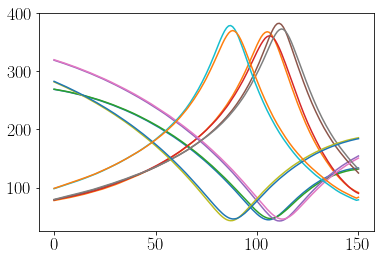

In [10]:
## All sims 100M


#check_orbit('LMC6/MWLMC6_100M_b0_orbit.txt')
print('-------------- LMC 5 ----------------')
check_orbit('LMC5/LMC5_100Mb0_orbit.txt')
check_orbit('LMC5/LMC5_100Mb1_orbit.txt')
print('-------------- LMC 4 ----------------')
check_orbit('LMC4/LMC4_100Mb0_orbit.txt')
check_orbit('LMC4/LMC4_100Mb1_orbit.txt')

print('-------------- LMC 3 ----------------')
check_orbit('LMC3/MWLMC3_100Mb0_orbit.txt')
check_orbit('LMC3/LMC3_100Mb1_orbit.txt')


## LMC6

In [3]:
orbit = reading_Nbody('LMC6/LMC6_40Mb0_ic11_orbit.txt')
print(shape(orbit))
R_gal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = orbit
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)
#plot(R_gal)


(14, 151)
ICs: 16.726308 244.672803 128.417707 16.737914 9.236501 -79.125439
[113]
Dr =  [ 1.041708] [ 2.699152] [-0.435855] [ 2.92584119]
Dv =  [ 28.052905] [ 22.179062] [ 3.679794] [ 35.95020381]
[-85.052905] [-248.179062] [ 217.320206]


(array([ 2.26]),
 array([-2.041708]),
 array([-43.699152]),
 array([-27.564145]),
 array([-85.052905]),
 array([-248.179062]),
 array([ 217.320206]))

In [12]:
orbit = reading_Nbody('LMC6/LMC6_40Mb0_ic11_orbit_future.txt')
print(shape(orbit))
R_gal_fut, x_sat_fut, y_sat_fut, z_sat_fut, x_gal_fut, y_gal_fut, z_gal_fut, Vgal_fut, vx_sat_fut, vy_sat_fut, vz_sat_fut, vx_gal_fut, vy_gal_fut, vz_gal_fut = orbit

(14, 252)


In [17]:
R_all = np.concatenate((R_gal, R_gal_fut))

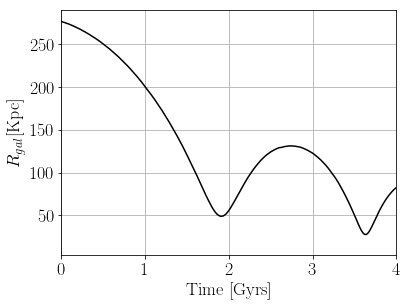

In [35]:
figure(figsize=(6,4.5))
t_gal = np.linspace(0, 7, 403)
plot(t_gal, R_all, c='k')
xlim(0, 4)
xlabel('Time [Gyrs]')
ylabel('$R_{gal}$[Kpc]')
grid()

savefig('LMC_future_orbit.pdf', bbox_inches='tight', dpi=150)


In [7]:
check_orbit('LMC4/LMC4_100Mb1_orbit.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'orbits/LMC4/LMC4_100Mb1_orbit.txt'

(14, 31)
ICs: 16.909358 116.292214 -46.840781 -12.591254 -211.794425 -82.474268
[28]
Dr =  [-0.067235] [ 0.491439] [ 1.670474] [ 1.74256025]
Dv =  [-5.721603] [ 28.055882] [-13.022167] [ 31.45546199]
[-51.278397] [-254.055882] [ 234.022167]


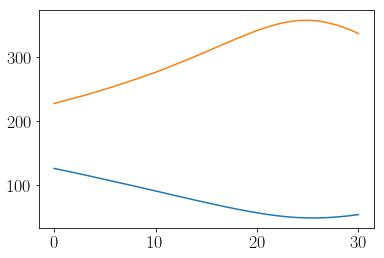

In [4]:
check_orbit('LMC6/LMC6_40Mb1_orbit_new_90_120.txt')
#check_orbit('LMC6/LMC6_40Mb1_orbit.txt')
#check_orbit('LMC6/LMC6_40Mb1_orbit_11.txt') # Re do orbit b=1

(14, 151)
ICs: 11.567879 248.001398 130.009842 11.64126 10.326457 -77.5811
[117]
Dr =  [ 0.42639] [ 0.667387] [-2.669268] [ 2.78427827]
Dv =  [ 0.510675] [ 24.218648] [-15.04593] [ 28.51637616]
[-57.510675] [-250.218648] [ 236.04593]


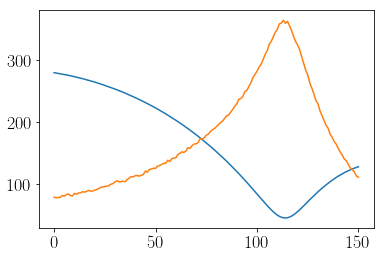

In [5]:
check_orbit('LMC6_100Mb0_orbit.txt')

## LMC5

(14, 151)
ICs: 14.771003 236.496574 128.882806 14.029015 11.597683 -78.118734
[112]
Dr =  [ 0.022338] [ 1.234601] [ 4.638696] [ 4.80023324]
Dv =  [ 15.822925] [ 32.864305] [ 13.855989] [ 39.01814872]
[-72.822925] [-258.864305] [ 207.144011]
(14, 151)
ICs: 10.806563 239.959761 128.867942 10.303297 14.750208 -78.235882
[117]
Dr =  [ 0.727108] [ 4.845362] [ 1.244443] [ 5.05518124]
Dv =  [-7.24135] [ 15.951667] [-5.210757] [ 18.27689302]
[-49.75865] [-241.951667] [ 226.210757]


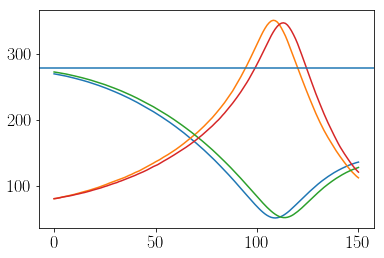

In [12]:
#check_orbit('LMC5/LMC5_40Mb0_ic11_orbit7.txt') # the best so far!
#check_orbit('LMC5/LMC5_40Mb0_ic11_orbit8.txt') # the best so far!
#check_orbit('LMC5/LMC5_40Mb0_ic11_orbit9.txt') # the best so far!
#check_orbit('LMC5/LMC5_40Mb0_ic11_orbit10.txt') # the best so far!
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit10.txt') # the best so far!
check_orbit('LMC5/LMC5_40Mb1_ic17_orbit.txt')
axhline(278)

(14, 151)
ICs: 14.780712 242.270848 128.876746 14.784036 10.653984 -78.31192
[116]
Dr =  [ 0.483961] [ 4.345995] [ 4.116013] [ 6.00528549]
Dv =  [ 17.052755] [ 20.810373] [ 7.753395] [ 27.9997002]
[-74.052755] [-246.810373] [ 213.246605]
(14, 151)
ICs: 14.780712 242.270848 128.876746 14.784036 30.653985 -78.31192
[135]
Dr =  [ 1.136566] [ 13.191966] [ 9.337025] [ 16.20184511]
Dv =  [-1.566675] [-17.026325] [-1.976194] [ 17.21207589]
[-55.433325] [-208.973675] [ 222.976194]
(14, 151)
ICs: 17.551172 241.748842 127.776269 17.437234 16.408387 -78.456088
[122]
Dr =  [ 0.853885] [ 7.580513] [ 6.908145] [ 10.29153848]
Dv =  [ 22.47287] [ 0.431021] [ 6.862659] [ 23.50131387]
[-79.47287] [-226.431021] [ 214.137341]
(14, 151)
ICs: 12.010712 240.270832 127.876754 14.601478 16.301938 -79.313159
[120]
Dr =  [-0.30732] [ 5.777382] [ 8.281096] [ 10.1019374]
Dv =  [ 3.470892] [ 10.364455] [ 8.252789] [ 13.69589519]
[-60.470892] [-236.364455] [ 212.747211]
(14, 151)
ICs: 17.551172 241.748842 127.776269

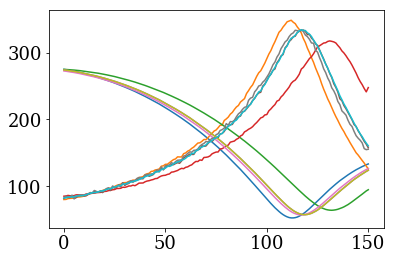

In [6]:
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit6.txt') # the best so far!
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit5.txt')
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit4.txt')
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit3.txt')
check_orbit('LMC5/LMC5_40Mb0_ic11_orbit2.txt')
#check_orbit('LMC5/LMC5_40Mb0_ic11_orbit.txt') start at 250kpc!

(14, 41)
ICs: 19.473513 66.065684 -52.944368 -34.521602 -270.642522 -49.632415
[17]
Dr =  [ 0.331938] [-2.192656] [-0.409654] [ 2.25515844]
Dv =  [ 24.266151] [ 31.983693] [-16.487709] [ 43.40100518]
[-81.266151] [-257.983693] [ 237.487709]


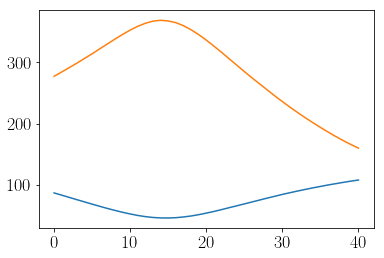

In [4]:
check_orbit('LMC5/LMC5_40Mb1_ic20_orbit_90_130.txt') # Re do orbit, double check!

(14, 151)
Dr =  [ 0.643318] [-11.86839] [-11.641382] [ 16.6371366]
Dv =  [ 7.348068] [ 55.97946] [-105.529057] [ 119.68323156]


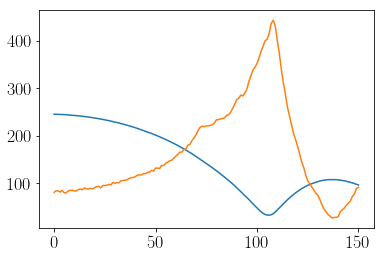

In [71]:
check_orbit('LMC5_40Mb09_new_orbit.txt') # ? Weird!

## LMC4

(14, 31)
ICs: 23.225209 129.023754 -50.491608 -17.807898 -208.687295 -61.802932
[30]
Dr =  [-0.523846] [-2.711718] [ 4.11752] [ 4.95800364]
Dv =  [ 7.854131] [ 46.12882] [-3.354251] [ 46.91275315]
[-64.854131] [-272.12882] [ 224.354251]


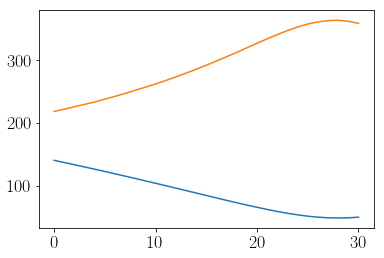

In [3]:
check_orbit('LMC4/LMC4_40Mb1_ic_orbit_90_120.txt') ## Check with new disk VCOM

(14, 31)
ICs: 30.258191 113.38149 -52.296404 -23.623345 -223.607944 -60.360868
[28]
Dr =  [ 0.184966] [ 4.831865] [ 1.0479] [ 4.94764855]
Dv =  [ 33.850427] [ 25.026886] [-1.136651] [ 42.11280573]
[-90.850427] [-251.026886] [ 222.136651]
(14, 31)
ICs: 28.101513 89.501025 -51.321277 -31.526588 -254.204893 -51.047995
[22]
Dr =  [ 0.013716] [ 3.266001] [-1.13537] [ 3.4577472]
Dv =  [ 42.3236] [ 34.761955] [ 2.512234] [ 54.82692725]
[-99.3236] [-260.761955] [ 218.487766]


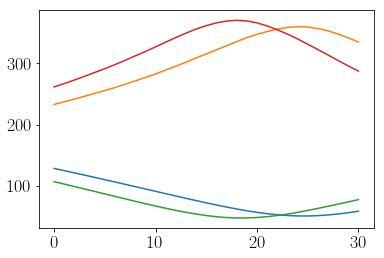

In [5]:
#check_orbit('LMC4/LMC4_40Mb0_new_ic4_90_120.txt') ## Check with new disk VCOM
check_orbit('LMC4/LMC4_40Mb0_new_ic10_90_120.txt') ## Check with new disk VCOM
check_orbit('LMC4/LMC4_40Mb0_new_ic9_90_120.txt') ## Check with new disk VCOM

(14, 151)
ICs: 27.768356 306.475877 87.583495 8.901745 -39.680501 -69.530751
[115]
Dr =  [-1.220231] [-1.126895] [ 2.380497] [ 2.9026922]
Dv =  [ 28.3149] [ 42.558582] [ 0.867357] [ 51.12454178]
[-85.3149] [-268.558582] [ 220.132643]
(14, 151)
ICs: 29.390663 315.942843 87.043709 7.414072 -40.408325 -69.937897
[119]
Dr =  [-0.199728] [ 3.965011] [-0.776424] [ 4.04524878]
Dv =  [ 36.602792] [ 25.010993] [-23.703941] [ 50.27117436]
[-93.602792] [-251.010993] [ 244.703941]
(14, 151)
ICs: 29.390663 297.942875 87.043709 7.414072 -40.408325 -69.937897
[109]
Dr =  [-0.662086] [-2.398009] [-1.834319] [ 3.09087871]
Dv =  [ 43.224866] [ 45.646114] [-20.596331] [ 66.15259341]
[-100.224866] [-271.646114] [ 241.596331]
(14, 151)
ICs: 24.992865 307.999186 88.605348 5.34531 -37.697963 -68.13602
[115]
Dr =  [-2.292964] [-3.654977] [ 0.639226] [ 4.36178297]
Dv =  [ 34.784986] [ 53.936385] [-2.998759] [ 64.25045862]
[-91.784986] [-279.936385] [ 223.998759]


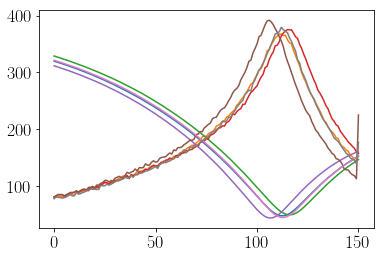

In [16]:
check_orbit('LMC4/LMC4_40Mb0_ic11_orbit.txt') #Check with new disk VCOM
check_orbit('LMC4/LMC4_40Mb0_ic11_orbit2.txt') #Check with new disk VCOM
check_orbit('LMC4/LMC4_40Mb0_ic11_orbit3.txt') #Check with new disk VCOM
check_orbit('LMC4/LMC4_40Mb0_orbit.txt')

(14, 151)
ICs: 29.390663 315.942843 87.043709 7.400359 -40.024868 -70.194933
[119]
Dr =  [-0.199728] [ 3.965011] [-0.776424] [ 4.04524878]
Dv =  [ 36.925285] [ 28.827389] [-22.651719] [ 52.03455969]
[-93.925285] [-254.827389] [ 243.651719]
(14, 151)
ICs: 29.390663 297.942875 87.043709 7.400377 -40.02492 -70.194957
[109]
Dr =  [-0.662086] [-2.398009] [-1.834319] [ 3.09087871]
Dv =  [ 44.310653] [ 49.617607] [-17.292297] [ 68.73401217]
[-101.310653] [-275.617607] [ 238.292297]
(14, 151)
ICs: 29.390662 309.942843 87.043717 7.400359 -40.024868 -70.194933
[115]
Dr =  [-1.829841] [-2.087023] [ 2.544187] [ 3.76521853]
Dv =  [ 38.575582] [ 48.473547] [-11.791845] [ 63.06193697]
[-95.575582] [-274.473547] [ 232.791845]
(14, 151)
ICs: 29.390178 305.942725 87.043457 7.400326 -40.024787 -70.194505
[113]
Dr =  [-1.526892] [-2.303024] [ 1.116379] [ 2.98020482]
Dv =  [ 39.416614] [ 51.07963] [-13.125528] [ 65.84130577]
[-96.416614] [-277.07963] [ 234.125528]
(14, 31)
ICs: 31.212166 129.465054 -52.777

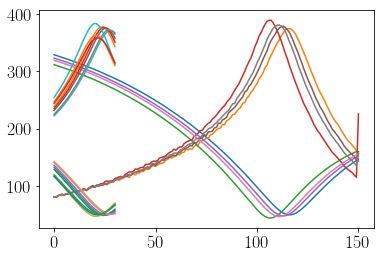

In [15]:
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_2.txt') #Check with new disk VCOM
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_3.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_4.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_5_90_120.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_6_90_120.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_7_90_120.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_8_90_120.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_9_90_120.txt')
check_orbit('LMC4/LMC4_40Mb1_ic20_orbit_10_90_120.txt')
check_orbit('LMC4/LMC4_40Mb0_new_ic5_90_120.txt')
check_orbit('LMC4/LMC4_40Mb0_new_ic6_90_120.txt')

|Simulation| ICs | 
|--------|---------|
| LMC3_H10 |  | 
| LMC4_H0 | r=(20.392142 266.90138 82.252445), v=(7.370204 -32.65387 7.370204) | 
| LMC4_H1 | r=(15.938147 184.318269 43.330524), v=(10.949636 -22.197442 -99.102962) | 
| LMC4_H2 | r=(15.255384 191.783586 54.76852), v=(11.616064 -11.796171 -94.946403) | 
| LMC4_H3 | r=(14.537944 198.811104 66.078902), v=(12.088886 -2.755792 -90.558497)  | 
| LMC4_H4 | r=(13.810617 205.552718 77.212577), v=(12.40013 5.042759 -86.069407) | 
| LMC5_H1 | r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 
| LMC6_H1 | r=(11.584929 247.791118 129.901859), v=(11.910111 11.210542 -77.135969)  | 


## LMC3 

(14, 151)
ICs: 27.102531 276.227045 57.532543 7.222458 -61.062745 -78.713425
[93]
Dr =  [-0.76477] [ 2.331094] [ 2.74644] [ 3.68263561]
Dv =  [ 21.227024] [ 37.166301] [ 7.346508] [ 43.42685411]
[-78.227024] [-263.166301] [ 213.653492]


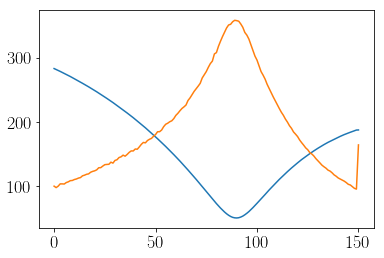

In [5]:
check_orbit('LMC3/LMC3_40Mb0_ic11_orbit.txt')

(14, 31)
ICs: 4.543647 -9.537388 -49.56077 -49.781354 -327.040243 135.680504
[5]
Dr =  [-0.303047] [-1.082503] [ 3.150422] [ 3.34496771]
Dv =  [-3.444746] [ 44.66625] [-0.315503] [ 44.79999672]
[-53.555254] [-270.66625] [ 221.315503]


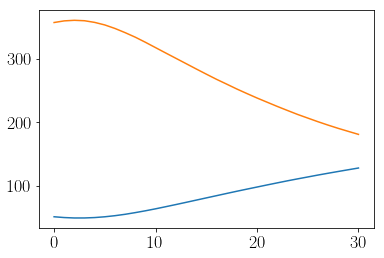

In [8]:
#check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit1.txt') ## the best so far!  Check with new disk VCOM
#check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit2.txt')
#check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit3.txt')
#check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit4.txt')
#check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit5.txt')
#check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit6.txt')
#check_orbit('LMC3/LMC3_40Mb1_ic20_new_orbit7.txt')
check_orbit('LMC3/LMC3_40Mb1_new_90_120.txt') # Finally!

## paper plots

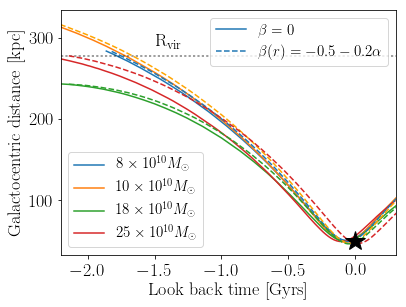

In [50]:
figure(figsize=(6,4.5))


l1, = plot(np.linspace(0, 3, 151)-1.86, R_gal3, label=r'$8 \times 10^{10} M_{\odot}$')
plot(np.linspace(0, 3, 151)-2.32, R_gal4, label=r'$10 \times 10^{10} M_{\odot}$')
plot(np.linspace(0, 3, 151)-2.24, R_gal5, label=r'$18 \times 10^{10} M_{\odot}$')
plot(np.linspace(0, 3, 151)-2.3, R_gal6, label=r'$25 \times 10^{10} M_{\odot}$')

xlim(-2.2, 0.3)
axhline(278, ls=':', c='k', alpha=0.5)
text(-1.5, 285, '$\mathrm{R_{vir}}$', fontsize=18)

xlabel('Look\ back\ time\ [Gyrs]', fontsize=18)
ylabel('Galactocentric\ distance\ [kpc]', fontsize=18)

#plot(np.linspace(0, 3, 151)-1.82, R_gal3_b09, label=r'$8 \times 10^{10} M_{\odot}$', ls='--', c='k', lw=2.5)
l2, = plot(np.linspace(0, 3, 151)-1.82, R_gal3_b1, ls='--', c='#1f77b4')
#plot(np.linspace(0, 3, 151)-2.26, R_gal4_b09, label=r'$18 \times 10^{10} M_{\odot}$', ls=':', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.26, R_gal4_b1, ls='--', c='orange')
#plot(np.linspace(0, 3, 151)-2.14, R_gal5_b09, label=r'$18 \times 10^{10} M_{\odot}$', c='b', lw=1)
plot(np.linspace(0, 3, 151)-2.14, R_gal5_b1, ls='--', c='#2ca02c')
plot(np.linspace(0, 3, 151)-2.14, R_gal6_b1, ls='--', c='#d62728')

plot_lines = []
plot_lines.append([l1, l2])

plot(0, 49.65, '*', c='k', markersize=20)

legend1 = pyplot.legend(plot_lines[0], [r"$\beta=0$", r"$\beta(r)=-0.5-0.2 \alpha$"],
                       loc='upper right', fontsize=15)
pyplot.gca().add_artist(legend1)
plt.legend(fontsize=15)

savefig('../../../MW_anisotropy/figures/LMC_orbits.pdf', bbox_inches='tight', dpi=300)
savefig('../../../MW_anisotropy/figures/LMC_orbits.png', bbox_inches='tight', dpi=300)


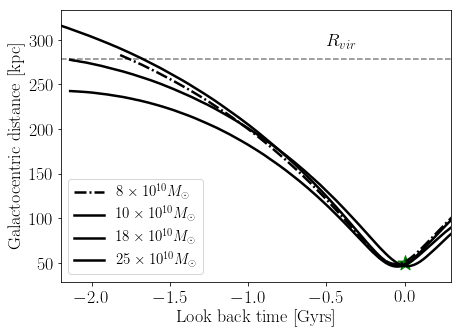

In [33]:
figure(figsize=(7,5))


#plot(np.linspace(0, 3, 151)-1.82, R_gal3_b09, label=r'$8 \times 10^{10} M_{\odot}$', ls='--', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-1.82, R_gal3_b1, label=r'$8 \times 10^{10} M_{\odot}$', ls='-.', c='k', lw=2.5)
#plot(np.linspace(0, 3, 151)-2.26, R_gal4_b09, label=r'$18 \times 10^{10} M_{\odot}$', ls=':', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.26, R_gal4_b1, label=r'$10 \times 10^{10} M_{\odot}$', c='k', lw=2.5)
#plot(np.linspace(0, 3, 151)-2.14, R_gal5_b09, label=r'$18 \times 10^{10} M_{\odot}$', c='b', lw=1)
plot(np.linspace(0, 3, 151)-2.14, R_gal5_b1, label=r'$18 \times 10^{10} M_{\odot}$', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.14, R_gal6_b1, label=r'$25 \times 10^{10} M_{\odot}$', c='k', lw=2.5)

xlim(-2.2, 0.3)
axhline(278, ls='--', c='k', alpha=0.5)
text(-0.5, 290, '$R_{vir}$', fontsize=18)

plt.scatter(0, 49.65, s=250, marker='*', c='green')
legend(fontsize=15)
xlabel('Look\ back\ time\ [Gyrs]', fontsize=18)
ylabel('Galactocentric\ distance\ [kpc]', fontsize=18)


In [20]:
## Peris  r_peri = 48.2 \pm 2.5  Salem 2015.

print(min(R_gal6)-48.2, min(R_gal5)-48.2, min(R_gal4)-48.2, min(R_gal3)-48.2)

-0.340324706044 0.0993320421771 -3.02808076611 -0.193182045483


[ 1.50254058  1.50206701  1.49974724  1.49895113  1.49753561  1.49643802
  1.49537814  1.49392676  1.49267601  1.49187013  1.49035006  1.48928133
  1.48772444  1.48686112  1.48593568  1.48436517  1.48306424  1.48201725
  1.48039363  1.47910772  1.47797411  1.47687     1.47528339  1.47424937
  1.47288592  1.47195287  1.47049893  1.46938682  1.46771769  1.46617673
  1.46502335  1.46331631  1.46257943  1.46072167  1.45941911  1.45819544
  1.45646326  1.45521102  1.45356151  1.45240905  1.45082188  1.44988062
  1.44779458  1.44658653  1.44468395  1.44296066  1.44123463  1.43998789
  1.43851967  1.43714108  1.43522041  1.433685    1.43145016  1.42941464
  1.42812082  1.42637703  1.42474924  1.42306656  1.42103129  1.4191044
  1.41704656  1.41489566  1.41282163  1.41091725  1.40862034  1.40664631
  1.40419999  1.40204441  1.4000295   1.39764327  1.39514572  1.39268905
  1.38980214  1.38767511  1.38410976  1.38078215  1.37753992  1.37419533
  1.37107871  1.36787653  1.36356355  1.35924527  1.

Text(-3.14159,-3.14159,'$R_{gal}[kpc]$')

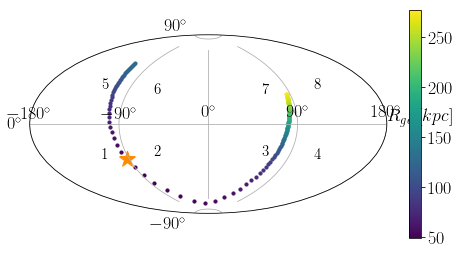

In [40]:
from astropy.coordinates import SkyCoord
from astropy import units as u

norm = matplotlib.colors.Normalize(vmin=min(R_gal),vmax=max(R_gal))
c_m = matplotlib.cm.viridis
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])


c_gal = SkyCoord(x=(x_sat-x_gal)*u.kpc,
                 y=(y_sat-y_gal)*u.kpc,
                 z=(z_sat-z_gal)*u.kpc, representation='cartesian',
                 frame='galactocentric')

c_gal.representation = 'spherical'


## to degrees and range of l.

l_degrees = c_gal.lon.wrap_at(180 * u.deg).radian
#l_degrees = c_gal.l.radian
b_degrees = c_gal.lat.radian
fig = plt.figure(figsize=(8,4.2))
ax = fig.add_subplot(111, projection="aitoff")
print(l_degrees)
for i in range(len(l_degrees)):
    ax.scatter(l_degrees[i], b_degrees[i], c=s_m.to_rgba(R_gal[i]) , s=10)
ax.scatter(l_degrees[113], b_degrees[113], c='darkorange' , s=280, marker='*')
colorbar(s_m)

ax.xaxis.set_ticks([-np.pi, -np.pi/2., 0, np.pi/2., np.pi])
ax.xaxis.set_ticks([-np.pi, -3*np.pi/4., -np.pi/2., -np.pi/4.\
                    ,0, np.pi/4. ,np.pi/2., 3*np.pi/4., np.pi],\
                    minor=True)

ax.yaxis.set_ticks([ -np.pi/2.1, 0, np.pi/2.1])

ax.yaxis.set_ticks([ -np.pi/2.1, -np.pi/4., 0, np.pi/4.,\
                     np.pi/2.1], minor=True)

ax.text(-np.pi/1.5, np.pi/6., '$5$', fontsize=15, color='k')
ax.text(-np.pi/3., np.pi/6., '$6$', fontsize=15, color='k')
ax.text(np.pi/3., np.pi/6., '$7$', fontsize=15, color='k')
ax.text(np.pi/1.5, np.pi/6., '$8$', fontsize=15, color='k')
ax.text(-np.pi/1.5, -np.pi/6., '$1$', fontsize=15, color='k')
ax.text(-np.pi/3., -np.pi/6., '$2$', fontsize=15, color='k')
ax.text(np.pi/3, -np.pi/6., '$3$', fontsize=15, color='k')
ax.text(np.pi/1.5, -np.pi/6., '$4$', fontsize=15, color='k')
#ax.yaxis.set_ticks([ -np.pi/2.1, 0, np.pi/2.1])
#ax.yaxis.set_ticks([ -np.pi/2.1, 0, np.pi/2.1])
#ax.yaxis.set_ticks([ -np.pi/2.1, 0, np.pi/2.1])
ax.grid(which='major')
ax.text(-np.pi, -np.pi, '$R_{gal}[kpc]$')
#savefig('../../../MW_anisotropy/figures/LMC_orbit_aitoff.png', bbox_inches='tight', dpi=150)
#savefig('../../../MW_anisotropy/figures/LMC_orbit_aitoff.pdf', bbox_inches='tight', dpi=150)

In [29]:
text?
